### CNN

In [1]:
from scipy import misc
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize

In [15]:
input_image = imread('/Users/patrycjapiechowicz/MOJ_GIT/dataworkshop/inputs/damir.jpg')
input_image.shape

(4000, 6000, 3)

### Szarosci

(4000, 6000)


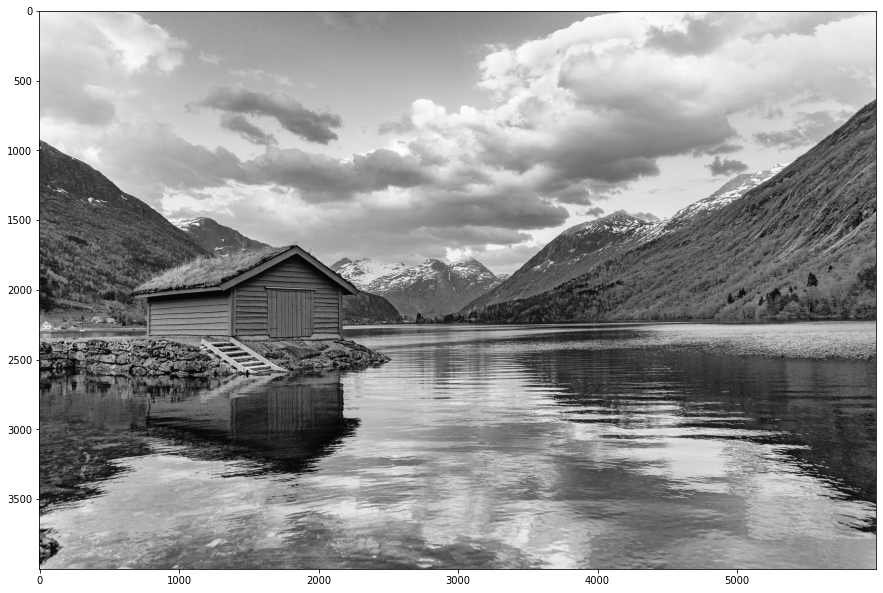

In [16]:
def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

plt.figure(figsize=(15,15))
gray_image = rgb2gray(input_image)

print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')
plt.show()

In [18]:
gray_image.shape #1 kanal

(4000, 6000)

(2000, 3000)


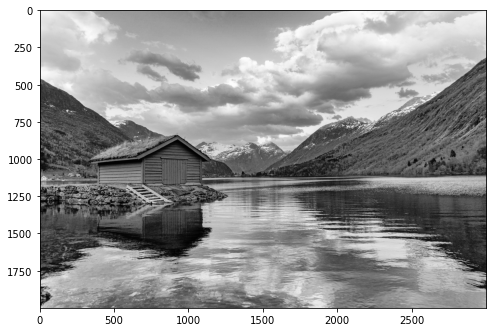

In [20]:
small_image = resize(gray_image, (gray_image.shape[0] / 2, gray_image.shape[1] / 2), mode='constant')
print(small_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(small_image, cmap='gray')
plt.show()

In [21]:
def range_0_255(x):
    if x > 255: return 255
    if x < 0: return 0
    
    return x

def norm(feat):
    vectorize_range_0_255 = np.vectorize(range_0_255)
    return vectorize_range_0_255(np.copy(feat))

def apply_kernel_to_image(img, kernel):

    feature = convolve2d(img, kernel, boundary='symm', mode='same')

    # Plot
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(img, 'gray')
    ax1.set_title('Input image (512 x 512)', fontsize=15)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(kernel, 'gray')
    ax2.set_title('Kernel ({0} x {0})'.format(kernel.shape[0]), fontsize=15)
    ax2.set_xticks([])
    ax2.set_yticks([])

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.imshow(norm(feature), 'gray')
    ax3.set_title('Feature map', fontsize=15)
    ax3.set_xticks([])
    ax3.set_yticks([])
    plt.show()

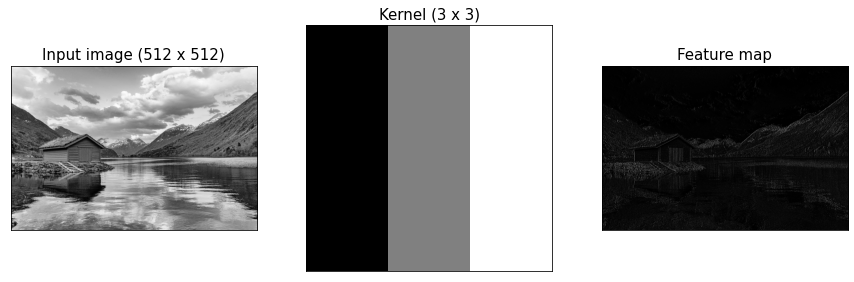

In [22]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])

apply_kernel_to_image(small_image, kernel)

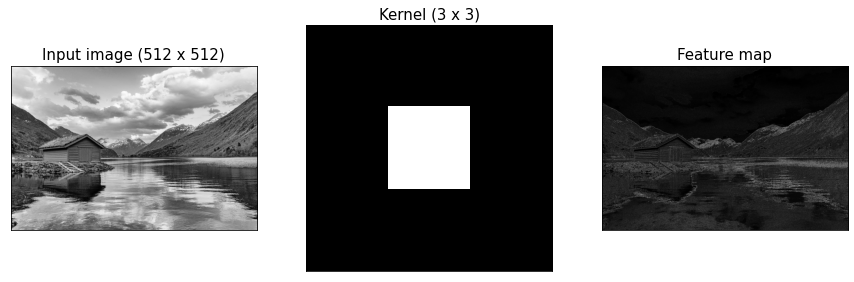

In [23]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]])

apply_kernel_to_image(small_image, kernel)

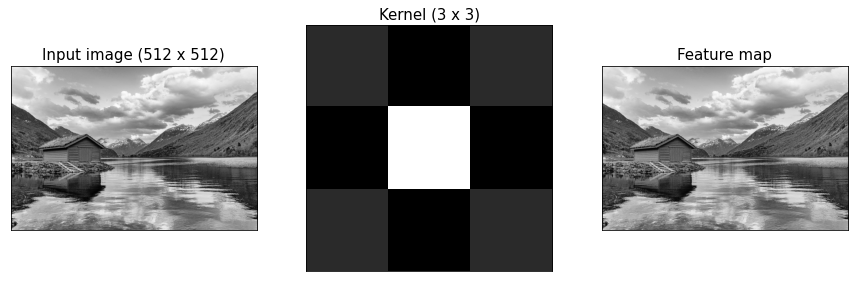

In [24]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]])

apply_kernel_to_image(small_image, kernel)

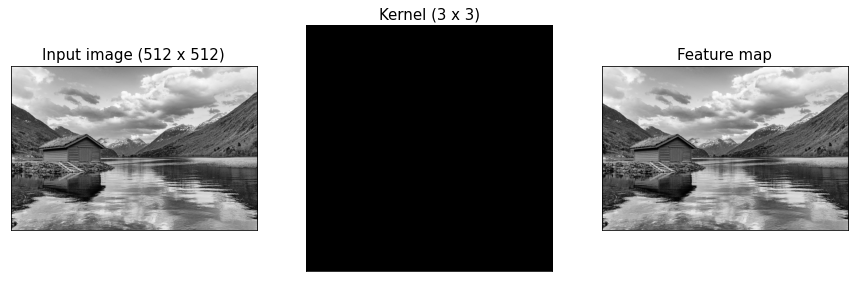

In [25]:
kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]])

apply_kernel_to_image(small_image, kernel)

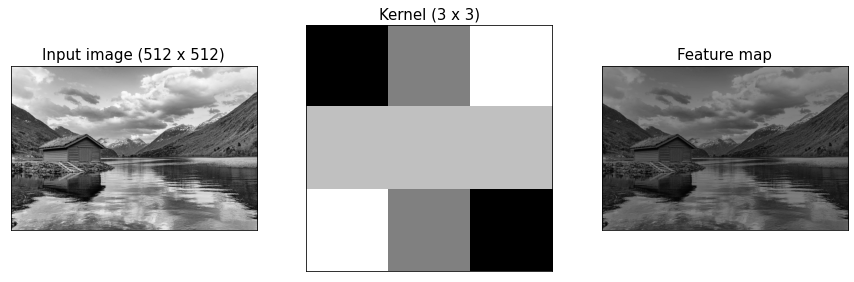

In [26]:
kernel = 1/9 * np.array([
    [-2, 0, 2],
    [1, 1, 1],
    [2, 0, -2]])

apply_kernel_to_image(small_image, kernel)

### Model SAM dobiera filtry w procesie trenowania

In [35]:
# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

# Keras
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPool2D

img_rows, img_cols = small_image.shape
input_shape = (img_rows, img_cols, 1)

In [47]:
my_image = small_image.reshape(img_rows,img_cols,1)

In [49]:
my_image.shape

(2000, 3000, 1)

### Conv layer

In [50]:
filters = 9

model = Sequential([
    Conv2D(filters=filters, kernel_size=(3, 3), input_shape=input_shape)
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
pred = model.predict(np.array([my_image]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1998, 2998, 9)     90        
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


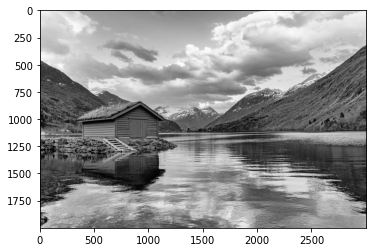

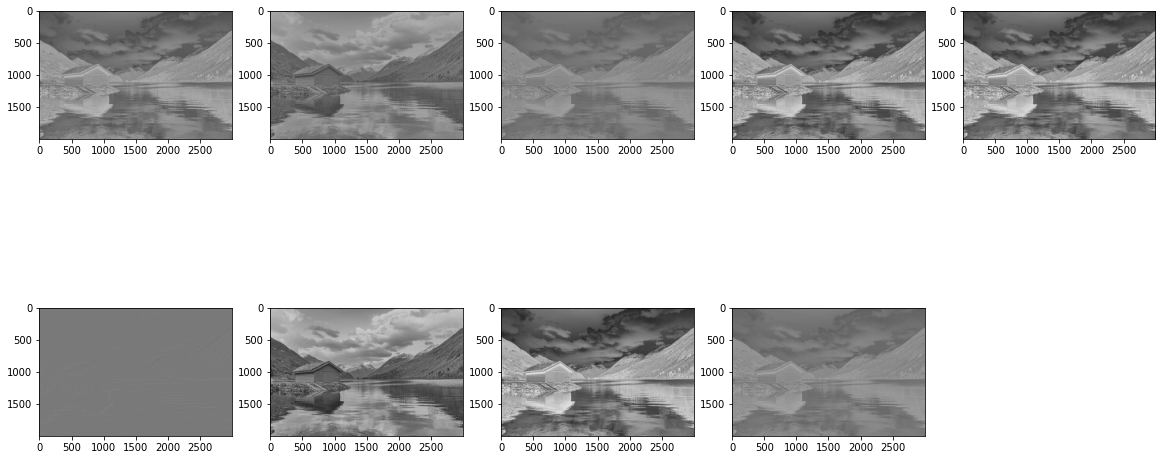

In [51]:
plt.imshow(small_image, cmap='gray')

plt.figure(figsize=(20,10))
for i in range(filters):
    plt.subplot("25{0}".format(i+1) )
    plt.imshow(pred[0,:,:,i], cmap='gray')

plt.show()

### Conv layer + Pool

In [54]:
filters = 9

model = Sequential([
    Conv2D(filters=filters, kernel_size=(3, 3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2))
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
pred = model.predict(np.array([my_image]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1998, 2998, 9)     90        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 999, 1499, 9)      0         
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


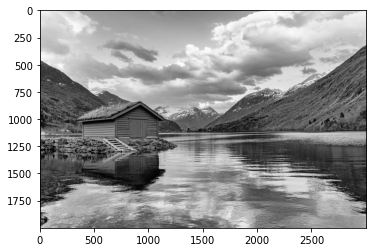

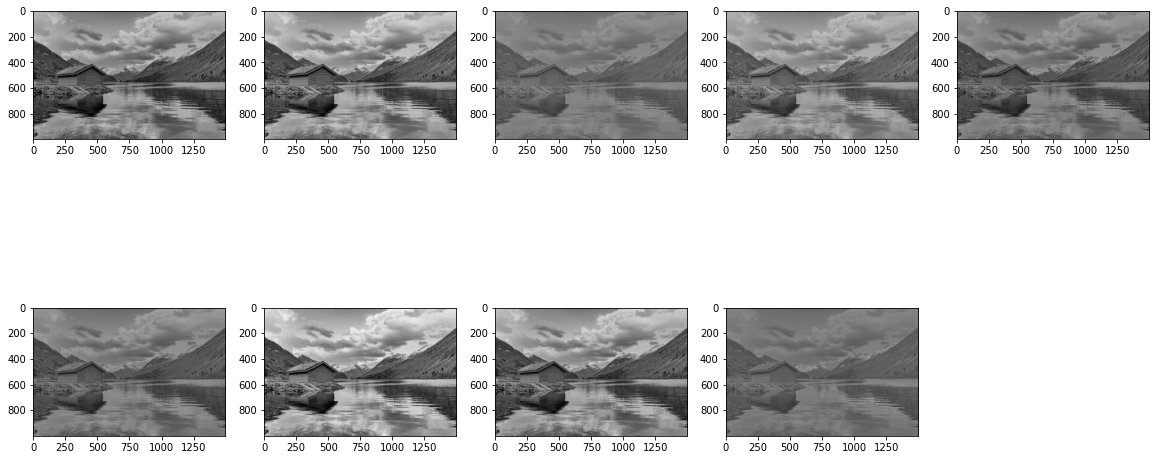

In [55]:
plt.imshow(small_image, cmap='gray')

plt.figure(figsize=(20,10))
for i in range(filters):
    plt.subplot("25{0}".format(i+1) )
    plt.imshow(pred[0,:,:,i], cmap='gray')

plt.show()

### (Conv + Pool) + (Conv + Pool)


In [56]:
filters = 9

model = Sequential([
    Conv2D(filters=filters, kernel_size=(3, 3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=filters, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2,2))
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
pred = model.predict(np.array([my_image]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1998, 2998, 9)     90        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 999, 1499, 9)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 997, 1497, 9)      738       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 498, 748, 9)       0         
Total params: 828
Trainable params: 828
Non-trainable params: 0
_________________________________________________________________


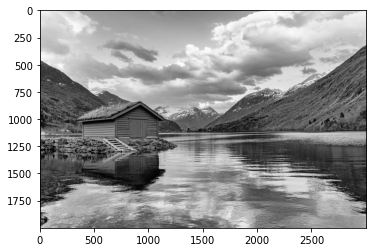

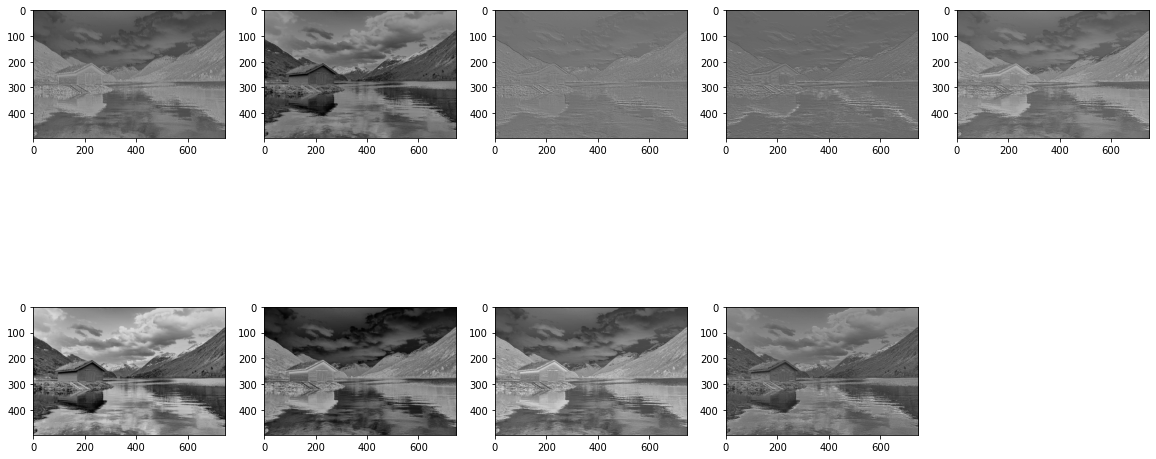

In [57]:
plt.imshow(small_image, cmap='gray')

plt.figure(figsize=(20,10))
for i in range(filters):
    plt.subplot("25{0}".format(i+1) )
    plt.imshow(pred[0,:,:,i], cmap='gray')

plt.show()